# Collego Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/ProgettoML4VM/Datasets/GTSDB_Yolo_trafficlight.zip" ./

In [3]:
!unzip ./GTSDB_Yolo_trafficlight.zip

Archive:  ./GTSDB_Yolo_trafficlight.zip
  inflating: data.yaml               
   creating: datasets/
   creating: datasets/images/
   creating: datasets/images/test/
  inflating: datasets/images/test/00024.jpeg  
  inflating: datasets/images/test/00042.jpeg  
  inflating: datasets/images/test/00047.jpeg  
  inflating: datasets/images/test/00083.jpeg  
  inflating: datasets/images/test/00086.jpeg  
  inflating: datasets/images/test/00092.jpeg  
  inflating: datasets/images/test/00096.jpeg  
  inflating: datasets/images/test/00106.jpeg  
  inflating: datasets/images/test/00166.jpeg  
  inflating: datasets/images/test/00167.jpeg  
  inflating: datasets/images/test/00175.jpeg  
  inflating: datasets/images/test/00177.jpeg  
  inflating: datasets/images/test/00194.jpeg  
  inflating: datasets/images/test/00202.jpeg  
  inflating: datasets/images/test/00205.jpeg  
  inflating: datasets/images/test/00216.jpeg  
  inflating: datasets/images/test/00223.jpeg  
  inflating: datasets/images/test/0

In [13]:
import matplotlib.pyplot as plt
import os

In [8]:
classNames = ["SpeedLimit 20 km/h", "SpeedLimit 30 km/h", "SpeedLimit 50 km/h", "SpeedLimit 60 km/h", "SpeedLimit 70 km/h", "SpeedLimit 80 km/h", "RestrictionEnds 80 km/h", "SpeedLimit 100 km/h", "SpeedLimit 120 km/h", "NoOvertaking", "NoOvertaking (trucks) ", "PriorityAtNextIntersection (danger)", "PriorityRoad", "GiveWay", "Stop", "NoTrafficBothWays", "NoTrucks", "NoEntry", "Danger", "BendLeft (danger)", "BendRight (danger)", "Bend (danger)", "UnevenRoad (danger)", "SlipperyRoad (danger)", "RoadNarrows (danger)", "Construction (danger)", "GeneralDanger", "PedestrianCrossing (danger)", "SchoolCrossing (danger)", "CyclesCrossing (danger)", "Snow (danger)", "Animals (danger)", "RestrictionEnds", "GoRight (mandatory)", "GoLeft (mandatory)", "GoStraight (mandatory)", "GoRightOrStraight (mandatory)", "GoLeftOrStraight (mandatory)", "KeepRight (mandatory)", "KeepLeft (mandatory)", "Roundabout (mandatory)", "RestrictionEnds (overtaking)", "RestrictionEnds (overtaking trucks)", "green trafficlight", "red trafficlight", "yellow trafficlight"]

classNamesITA = ["limite velocità 20kmh", "limite velocità 30kmh", "limite velocità 50kmh", "limite velocità 60kmh", "limite velocità 70kmh", "limite velocità 80kmh", "Fine restrizione 80kmh", "limite velocità 100kmh", "limite velocità 120kmh", "sorpasso vietato", "sorpasso vietato (Camion)", "dare precedenza al prossimo incrocio", "strada con priorità", "dare precedenza", "stop", "accesso vietato", "vietato (camion)", "accesso vietato", "pericolo generico", "curva sinistra", "curva destra", "curva", "strada sconnessa", "strada scivolosa", "restringimento carreggiata", "lavori in corso", "pericolo", "attraversamento pedonale", "attraversamento scolari", "attraversamento bici", "neve", "animali", "fine restrizione", "obbligo svoltare destra", "obbligo svoltare sinistra", "obbligo proseguire dritti", "procedere dritto o destra", "procedere dritto o a sinistra", "tenere la destra", "tenere la sinistra", "rotatoria", "fine restrizione sorpasso", "fine restrizione sorpasso (camion)", "semaforo verde", "semaforo rosso", "semaforo giallo"]


720
 - semaforo rosso: 111 (9.24%)
 - semaforo verde: 100 (8.33%)
 - tenere la destra: 75 (6.24%)
 - strada con priorità: 74 (6.16%)
 - dare precedenza: 68 (5.66%)
 - limite velocità 50kmh: 68 (5.66%)
 - sorpasso vietato (Camion): 61 (5.08%)
 - limite velocità 70kmh: 61 (5.08%)
 - limite velocità 30kmh: 55 (4.58%)
 - limite velocità 120kmh: 47 (3.91%)
 - limite velocità 80kmh: 36 (3.00%)
 - sorpasso vietato: 34 (2.83%)
 - pericolo generico: 33 (2.75%)
 - accesso vietato: 33 (2.75%)
 - dare precedenza al prossimo incrocio: 31 (2.58%)
 - limite velocità 100kmh: 31 (2.58%)
 - limite velocità 60kmh: 26 (2.16%)
 - lavori in corso: 23 (1.92%)
 - stop: 21 (1.75%)
 - obbligo proseguire dritti: 19 (1.58%)
 - strada scivolosa: 17 (1.42%)
 - Fine restrizione 80kmh: 15 (1.25%)
 - neve: 14 (1.17%)
 - pericolo: 13 (1.08%)
 - obbligo svoltare destra: 13 (1.08%)
 - strada sconnessa: 12 (1.00%)
 - attraversamento scolari: 11 (0.92%)
 - semaforo giallo: 10 (0.83%)
 - procedere dritto o destra: 9 (0.75%)

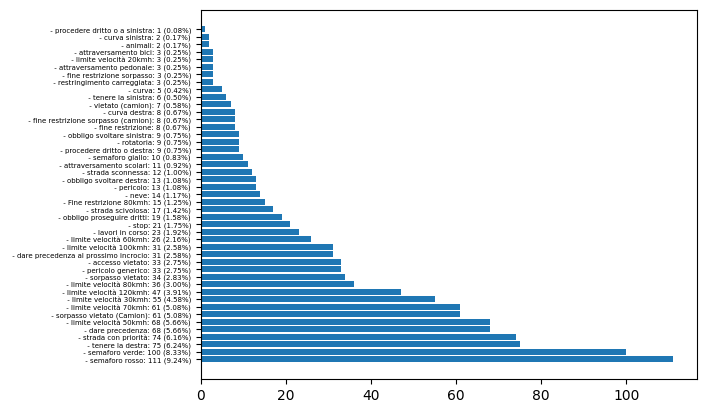

In [30]:


folder_path = './datasets/labels/train'

train_info = dict();

count_check = 0
count_tot = 0


for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
      with open(file_path, 'r') as file:
        count_check+=1
        for line in file:
            count_tot+=1
            (cl, xc, yc, w, h) = line.split(" ")
            cl = int(cl)
            cl = classNamesITA[cl]
            if cl not in train_info:
              train_info[cl]=1
            else:
              train_info[cl]+=1

print(count_check)

pie_x = [];
pie_labels=[];

train_info = dict(sorted(train_info.items(), key=lambda x: x[1], reverse=True))

for k in train_info.keys():
  label = f" - {k}: {train_info[k]} ({100*train_info[k]/count_tot:.2f}%)"
  pie_x.append(train_info[k])
  print(label)
  pie_labels.append(label)

plt.barh(pie_labels, pie_x);
plt.tick_params(axis='y', labelsize=5)

print(count_tot)


90
 - limite velocità 30kmh: 14 (9.72%)
 - semaforo verde: 10 (6.94%)
 - sorpasso vietato (Camion): 10 (6.94%)
 - semaforo rosso: 10 (6.94%)
 - limite velocità 80kmh: 9 (6.25%)
 - strada con priorità: 7 (4.86%)
 - accesso vietato: 7 (4.86%)
 - tenere la destra: 7 (4.86%)
 - limite velocità 50kmh: 7 (4.86%)
 - limite velocità 120kmh: 7 (4.86%)
 - dare precedenza: 6 (4.17%)
 - stop: 6 (4.17%)
 - sorpasso vietato: 5 (3.47%)
 - limite velocità 100kmh: 5 (3.47%)
 - fine restrizione sorpasso (camion): 3 (2.08%)
 - dare precedenza al prossimo incrocio: 3 (2.08%)
 - lavori in corso: 3 (2.08%)
 - pericolo generico: 3 (2.08%)
 - Fine restrizione 80kmh: 2 (1.39%)
 - fine restrizione sorpasso: 2 (1.39%)
 - restringimento carreggiata: 2 (1.39%)
 - obbligo svoltare destra: 2 (1.39%)
 - strada scivolosa: 2 (1.39%)
 - limite velocità 60kmh: 2 (1.39%)
 - pericolo: 2 (1.39%)
 - limite velocità 70kmh: 2 (1.39%)
 - obbligo svoltare sinistra: 1 (0.69%)
 - strada sconnessa: 1 (0.69%)
 - curva destra: 1 (0.6

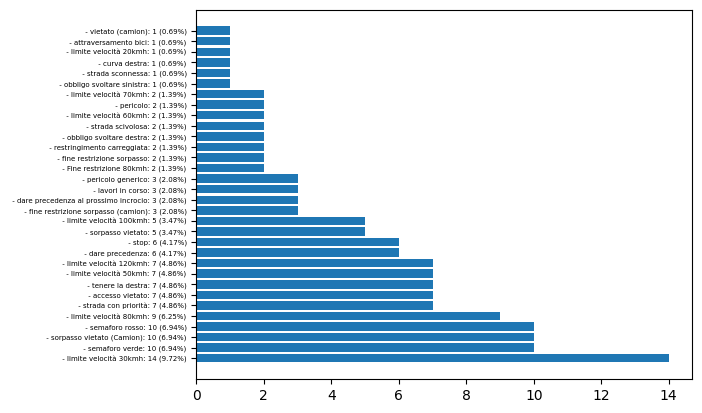

In [32]:


folder_path = './datasets/labels/val'

val_info = dict();

count_check = 0
count_tot = 0


for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
      with open(file_path, 'r') as file:
        count_check+=1
        for line in file:
            count_tot+=1
            (cl, xc, yc, w, h) = line.split(" ")
            cl = int(cl)
            cl = classNamesITA[cl]
            if cl not in val_info:
              val_info[cl]=1
            else:
              val_info[cl]+=1

print(count_check)

pie_x = [];
pie_labels=[];

val_info = dict(sorted(val_info.items(), key=lambda x: x[1], reverse=True))

for k in val_info.keys():
  label = f" - {k}: {val_info[k]} ({100*val_info[k]/count_tot:.2f}%)"
  pie_x.append(val_info[k])
  print(label)
  pie_labels.append(label)

plt.barh(pie_labels, pie_x);
plt.tick_params(axis='y', labelsize=5)

print(count_tot)


90
 - semaforo rosso: 12 (8.82%)
 - semaforo verde: 12 (8.82%)
 - limite velocità 30kmh: 10 (7.35%)
 - sorpasso vietato (Camion): 9 (6.62%)
 - dare precedenza: 9 (6.62%)
 - limite velocità 80kmh: 8 (5.88%)
 - limite velocità 50kmh: 6 (4.41%)
 - tenere la destra: 6 (4.41%)
 - limite velocità 70kmh: 5 (3.68%)
 - stop: 5 (3.68%)
 - limite velocità 100kmh: 5 (3.68%)
 - lavori in corso: 5 (3.68%)
 - strada con priorità: 4 (2.94%)
 - accesso vietato: 4 (2.94%)
 - dare precedenza al prossimo incrocio: 4 (2.94%)
 - attraversamento scolari: 3 (2.21%)
 - limite velocità 120kmh: 3 (2.21%)
 - pericolo: 3 (2.21%)
 - semaforo giallo: 3 (2.21%)
 - obbligo svoltare sinistra: 2 (1.47%)
 - sorpasso vietato: 2 (1.47%)
 - fine restrizione sorpasso: 2 (1.47%)
 - pericolo generico: 2 (1.47%)
 - Fine restrizione 80kmh: 2 (1.47%)
 - limite velocità 60kmh: 2 (1.47%)
 - neve: 2 (1.47%)
 - rotatoria: 1 (0.74%)
 - obbligo proseguire dritti: 1 (0.74%)
 - obbligo svoltare destra: 1 (0.74%)
 - attraversamento bici: 

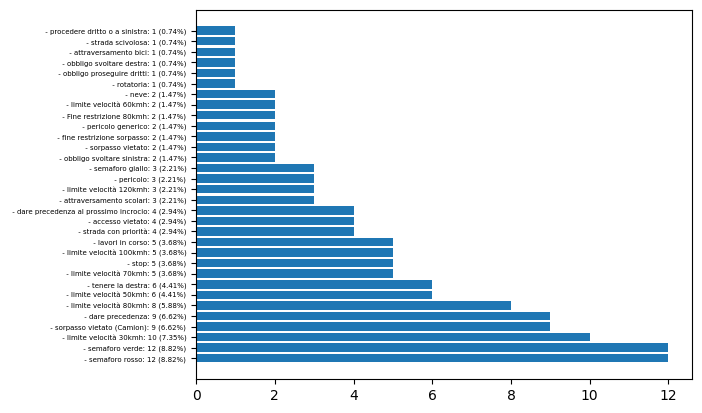

In [33]:


folder_path = './datasets/labels/test'

test_info = dict();

count_check = 0
count_tot = 0


for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
      with open(file_path, 'r') as file:
        count_check+=1
        for line in file:
            count_tot+=1
            (cl, xc, yc, w, h) = line.split(" ")
            cl = int(cl)
            cl = classNamesITA[cl]
            if cl not in test_info:
              test_info[cl]=1
            else:
              test_info[cl]+=1

print(count_check)

pie_x = [];
pie_labels=[];

test_info = dict(sorted(test_info.items(), key=lambda x: x[1], reverse=True))

for k in test_info.keys():
  label = f" - {k}: {test_info[k]} ({100*test_info[k]/count_tot:.2f}%)"
  pie_x.append(test_info[k])
  print(label)
  pie_labels.append(label)

plt.barh(pie_labels, pie_x);
plt.tick_params(axis='y', labelsize=5)

print(count_tot)
